In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## about the columns of the dataframe

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the
particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome
variable to be predicted.

## Results:
You have to build a solution that should able to predict the sales of the 
different stores of Big Mart according to the provided dataset.

In [2]:
data= pd.read_csv(r"C:\Users\SAURABH SRIVASTAVA\Desktop\ineuron_Internship\notebooks\data\BigMart_Train.csv")

In [3]:
data.sample(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8299,FDV09,12.10,Low Fat,0.020601,Snack Foods,147.5734,OUT049,1999,Medium,Tier 1,Supermarket Type1,3414.8882
4488,FDS47,16.75,Low Fat,0.128861,Breads,86.2856,OUT035,2004,Small,Tier 2,Supermarket Type1,1406.1696
1975,FDZ38,17.60,Low Fat,0.008046,Dairy,173.7422,OUT017,2007,NaN,Tier 2,Supermarket Type1,5863.0348
2407,FDU15,13.65,Regular,0.044526,Meat,37.9532,OUT010,1998,NaN,Tier 3,Grocery Store,71.9064
3261,FDV40,17.35,Low Fat,0.014692,Frozen Foods,74.1038,OUT046,1997,Small,Tier 1,Supermarket Type1,960.7494
3907,FDO22,13.50,Regular,0.017887,Snack Foods,79.4960,OUT049,1999,Medium,Tier 1,Supermarket Type1,1438.1280
4499,DRM59,5.88,Low Fat,0.003599,Hard Drinks,152.2998,OUT045,2002,NaN,Tier 2,Supermarket Type1,3075.9960
5265,NCG18,NaN,Low Fat,0.022867,Household,102.8332,OUT027,1985,Medium,Tier 3,Supermarket Type3,2768.3964
3581,FDN12,15.60,Low Fat,0.081104,Baking Goods,112.3544,OUT046,1997,Small,Tier 1,Supermarket Type1,1006.6896
6569,FDM20,10.00,Low Fat,0.038654,Fruits and Vegetables,245.4144,OUT013,1987,High,Tier 3,Supermarket Type1,7105.4176


In [4]:
data.shape

(8523, 12)

In [5]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [9]:
data=data.drop(labels=['Item_Identifier'],axis=1)

In [10]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
data=data.drop(labels=['Outlet_Establishment_Year'],axis=1)

In [12]:
data=data.drop(labels=['Item_Type'],axis=1)

In [13]:
data.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3642,17.850,Low Fat,0.011226,211.9560,OUT013,High,Tier 3,Supermarket Type1,4474.1760
6288,8.575,Low Fat,0.023934,105.8280,OUT045,NaN,Tier 2,Supermarket Type1,958.7520
7120,8.615,Low Fat,0.116723,95.4436,OUT018,Medium,Tier 3,Supermarket Type2,567.2616
729,18.700,Low Fat,0.089272,254.7672,OUT046,Small,Tier 1,Supermarket Type1,5113.3440
621,20.600,LF,0.083133,120.1756,OUT049,Medium,Tier 1,Supermarket Type1,1332.9316


In [14]:
data.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [15]:
cat_col=data.columns[data.dtypes=="object"]

In [16]:
data[cat_col]

,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...
8518,Low Fat,OUT013,High,Tier 3,Supermarket Type1
8519,Regular,OUT045,NaN,Tier 2,Supermarket Type1
8520,Low Fat,OUT035,Small,Tier 2,Supermarket Type1
8521,Regular,OUT018,Medium,Tier 3,Supermarket Type2


In [17]:
num_col=data.columns[data.dtypes!="object"]

In [18]:
data[num_col]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
3,19.200,0.000000,182.0950,732.3800
4,8.930,0.000000,53.8614,994.7052
...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834
8519,8.380,0.046982,108.1570,549.2850
8520,10.600,0.035186,85.1224,1193.1136
8521,7.210,0.145221,103.1332,1845.5976


In [19]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [20]:
# for visualization of num_cols

import seaborn as sns


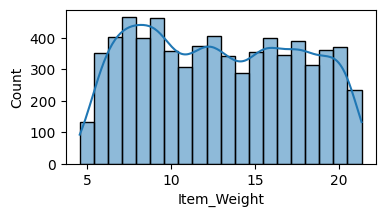

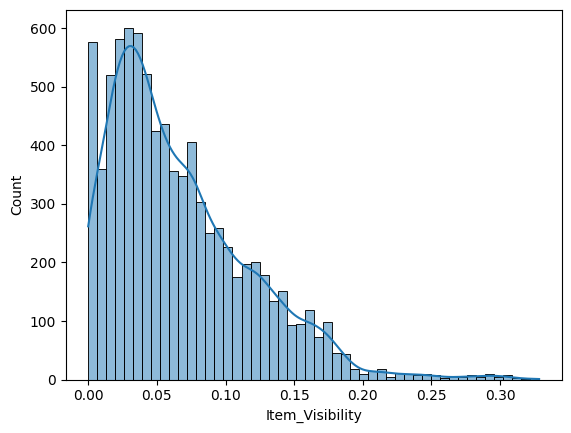

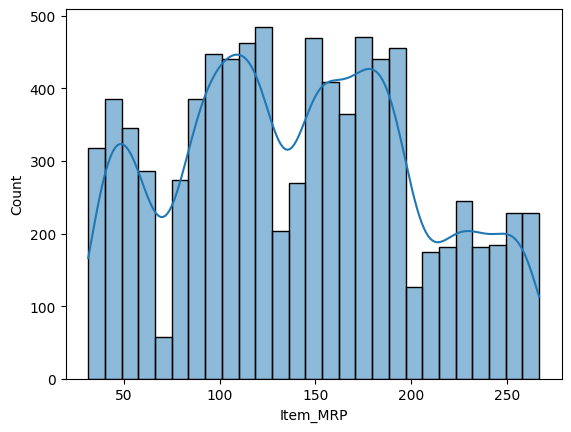

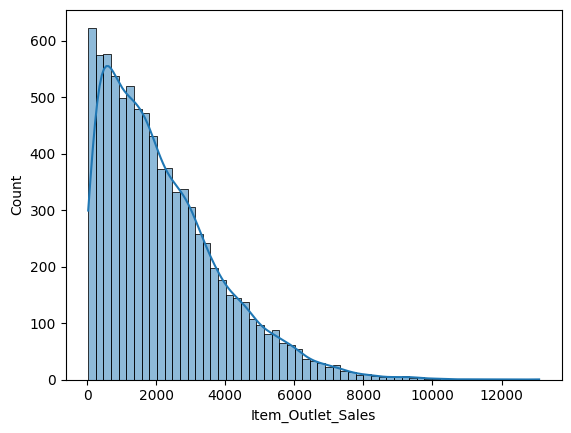

In [21]:
plt.figure(figsize= (4,2))

for col in num_col:
    sns.histplot(data=data, x=col, kde=True)
    plt.show()

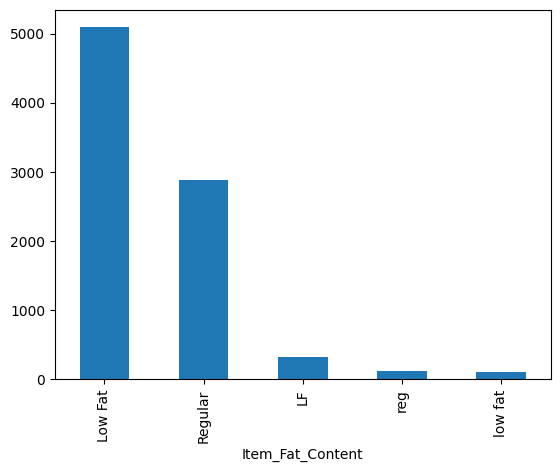

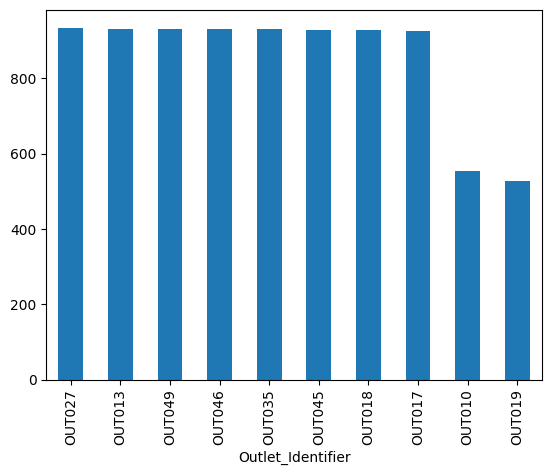

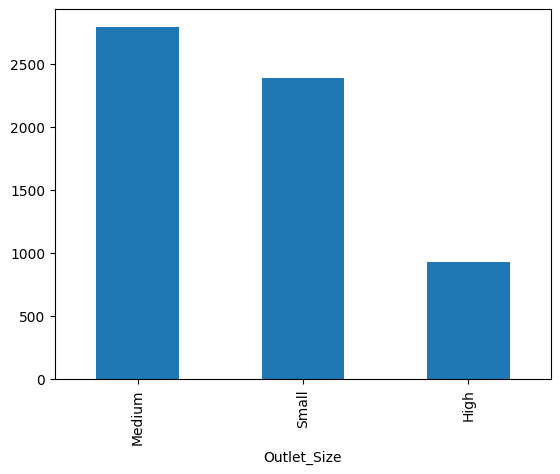

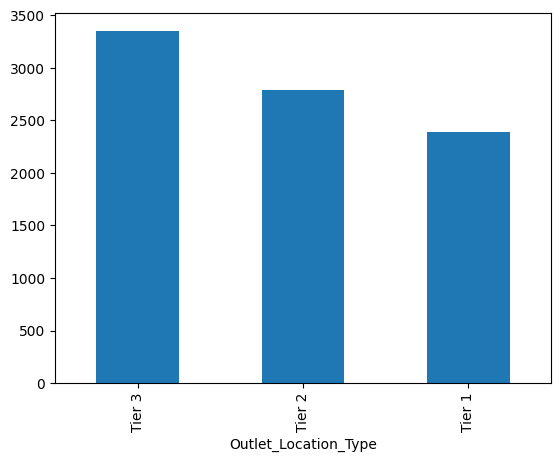

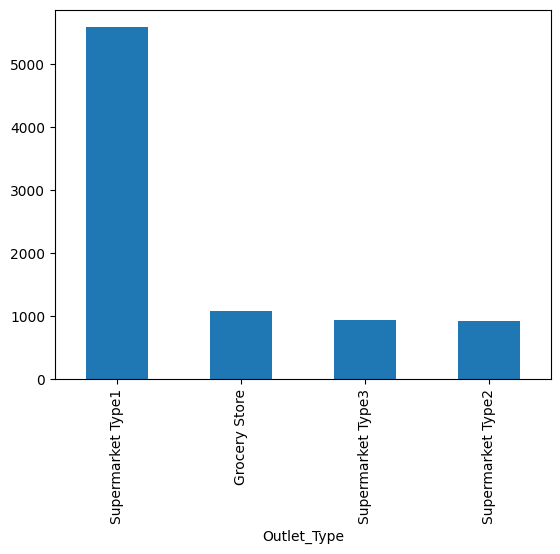

In [22]:
for col in cat_col:
    data[col].value_counts().plot(kind='bar')
    plt.show()



<Axes: >

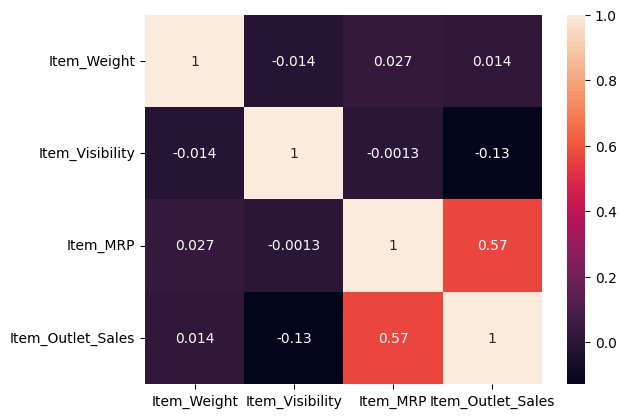

In [23]:
sns.heatmap(data[num_col].corr(),annot=True)

# outlier detection


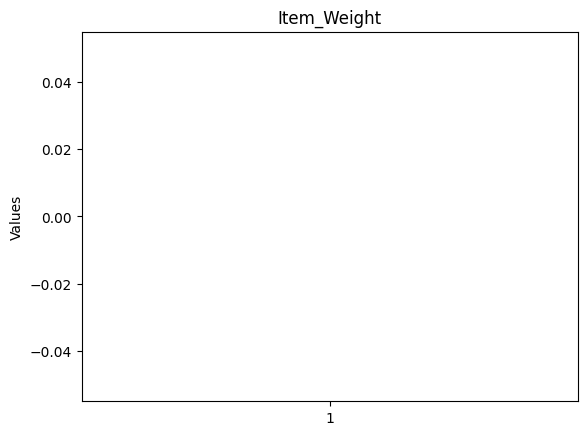

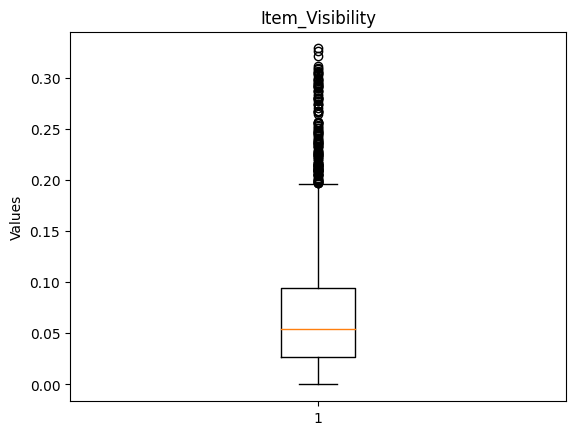

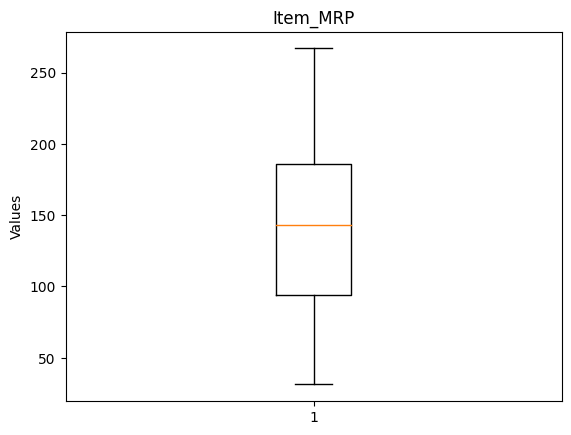

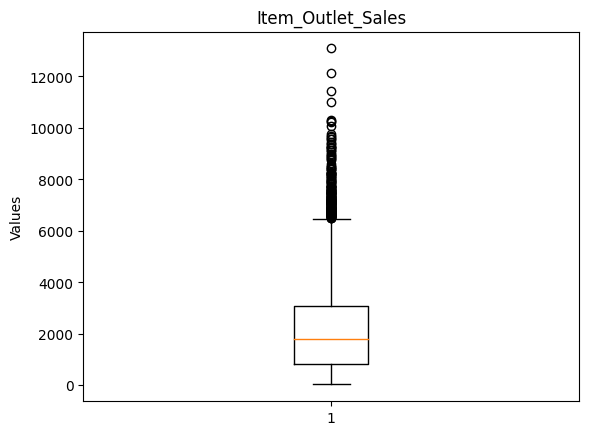

In [24]:
cols=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
for i in cols:
    plt.boxplot(data[i])
    plt.title(i)
    plt.ylabel('Values')
    plt.show()    

# ENCODING CATEGORICAL DATA

## 1- ORDINAL ENCODING

In [25]:
for col in cat_col:
    print( col, ":",data[col].unique())
    

Item_Fat_Content : ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Outlet_Identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size : ['Medium' nan 'High' 'Small']
Outlet_Location_Type : ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [26]:
# lable encoder
Item_Fat_Content_map={"Low Fat":0,"Regular":1,"low Fat":0,"LF":0,"reg":1}
# ordinal 
Outlet_Size_map={"Small":1,"Medium":2,"High":3}
Outlet_Location_Type_map={"Tier 3":1,"Tier 2":2,"Tier 1":3}


In [27]:
data["Item_Fat_Content"]= data["Item_Fat_Content"].map(Item_Fat_Content_map)

In [28]:
data["Outlet_Size"]= data["Outlet_Size"].map(Outlet_Size_map)


In [29]:
data["Outlet_Location_Type"]= data["Outlet_Location_Type"].map(Outlet_Location_Type_map)


In [30]:
data.sample(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4763,14.85,1.0,0.019551,263.7910,OUT045,NaN,2,Supermarket Type1,4207.8560
2539,12.15,0.0,0.015458,209.9928,OUT035,1.0,2,Supermarket Type1,5259.8200
7958,14.70,0.0,0.020903,144.5128,OUT013,3.0,1,Supermarket Type1,3307.6944
2918,16.10,1.0,0.025051,97.1410,OUT018,2.0,1,Supermarket Type2,1448.1150
3906,12.85,1.0,0.000000,252.3382,OUT046,1.0,3,Supermarket Type1,4794.4258


In [31]:
# one hot encoding will be done in the model training notebook